In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Step 2: Load your dataset 
df = pd.read_csv('/kaggle/input/restaurant-dataset/Restaurant_data.csv') 
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


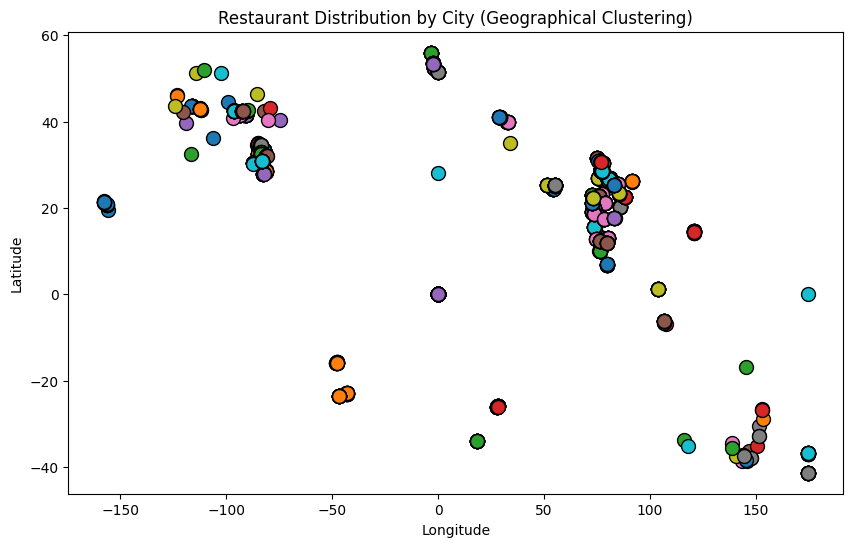

In [4]:
# Group by City and compute average coordinates
city_coords = df.groupby('City')[['Latitude', 'Longitude']].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))

# Plot each city
for idx, row in city_coords.iterrows():
    city_restaurants = df[df['City'] == row['City']]
    plt.scatter(city_restaurants['Longitude'], city_restaurants['Latitude'], 
                label=row['City'], s=100, edgecolor='k')

# Labels
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Restaurant Distribution by City (Geographical Clustering)')
plt.show()

In [13]:
# Clustering based on Latitude and Longitude
coords = df[['Latitude', 'Longitude']].dropna()

In [14]:
# Standardize coordinates
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

In [15]:
# Apply KMeans
kmeans_geo = KMeans(n_clusters=3, random_state=42)
df['Geo Cluster'] = kmeans_geo.fit_predict(coords_scaled)

In [16]:
# Compute average rating per cluster
cluster_ratings = df.groupby('Geo Cluster')['Aggregate rating'].mean().reset_index()
print(cluster_ratings)

   Geo Cluster  Aggregate rating
0            0          2.616408
1            1          2.273750
2            2          4.013900


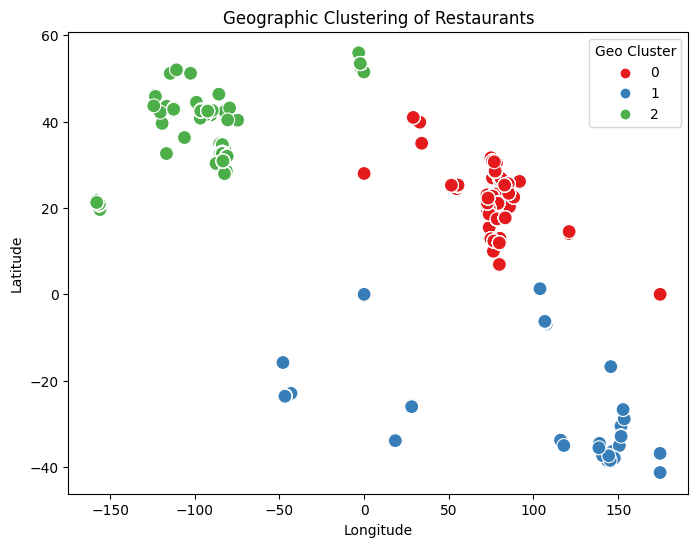

In [17]:
# Static scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Geo Cluster', palette='Set1', s=100)
plt.title('Geographic Clustering of Restaurants')
plt.show()

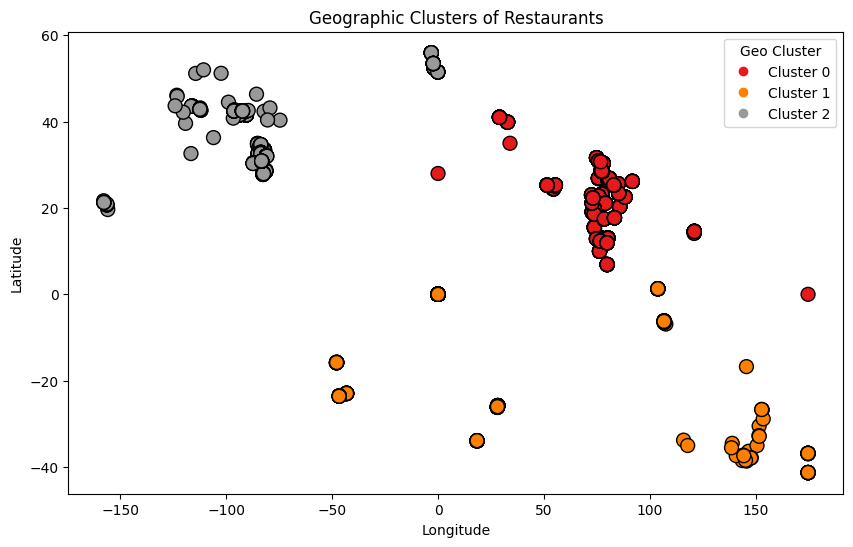

In [19]:
# Scatter plot with cluster colors
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Longitude'], df['Latitude'], 
                      c=df['Geo Cluster'], cmap='Set1', s=100, edgecolor='k')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Clusters of Restaurants')
# Optional: Add a legend for clusters
handles, labels = scatter.legend_elements()
plt.legend(handles, [f'Cluster {i}' for i in range(len(set(df["Geo Cluster"])))], title="Geo Cluster")
plt.show()

In [20]:
# Clustering based on Cuisines
# Fill missing cuisines with blank
df['Cuisines'] = df['Cuisines'].fillna('')

In [21]:
# TF-IDF vectorization
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df['Cuisines'])

In [22]:
# Apply KMeans
kmeans_cuisine = KMeans(n_clusters=3, random_state=42)
df['Cuisine Cluster'] = kmeans_cuisine.fit_predict(tfidf_matrix)

In [23]:
# Count of restaurants per cuisine cluster
print(df['Cuisine Cluster'].value_counts())

Cuisine Cluster
0    3554
1    3229
2    2768
Name: count, dtype: int64


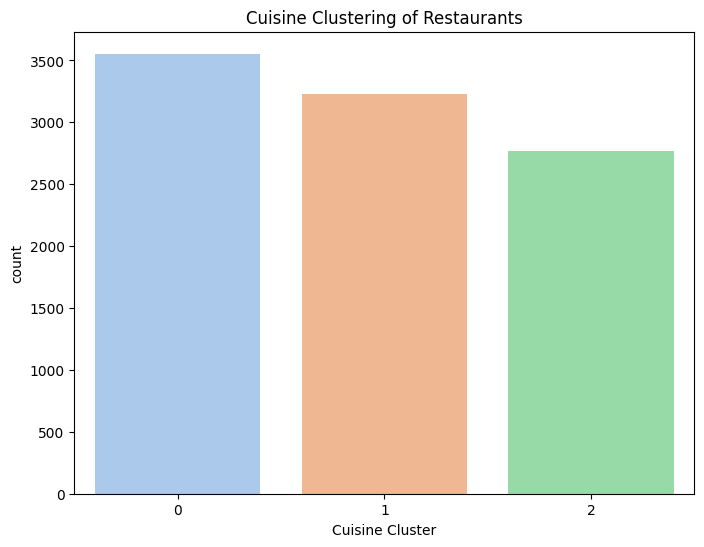

In [24]:
# Bar plot
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Cuisine Cluster', palette='pastel')
plt.title('Cuisine Clustering of Restaurants')
plt.show()